<a href="https://colab.research.google.com/github/aditya8075/EDA---Hotel-Booking-Analysis/blob/main/Aditya_Tadas_EDA_on_Hotel_Booking_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing important libraries for the EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting drive to googlr colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading dataset
df = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#Chaking shape of dataset
df.shape

(119390, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
#names of columns present in our dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
# checking the summary of statitics 
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
# checking if our data contain some missing order
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [10]:
#filling missing values
df['agent'].fillna(0,inplace=True)
df['company'].fillna(0,inplace=True)
df['country'].fillna('others',inplace=True)
df['children'].fillna(0,inplace=True)

In [11]:
df.isna().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [12]:
#cheking how many duplicated values present in out dataset
df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [13]:
#droping all duplicate values
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().value_counts()

False    87396
dtype: int64

# Feature Engineering

In [15]:
#creating new features 
df['total_people']=df['adults']+df['babies']+df['children']
df['total_stay']=df['stays_in_week_nights'] +df['stays_in_weekend_nights']

# Univarient Analysis

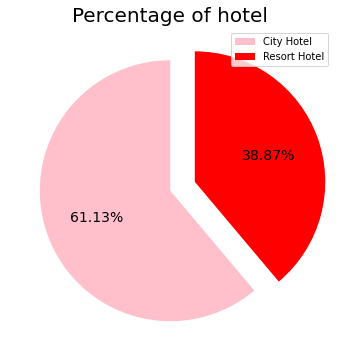

In [16]:
plt.figure(figsize=(7,6))
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()
explode = (0, 0.2)
colors = ['pink','red']
plt.pie(sizes, explode=explode, colors=colors,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of hotel', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' :10 })

Conclusion
1. As we can see in the following pie chart there are 61.13 % of prefers to stay in city hotels.
2. And 38.87 % peoples prefers to stay in Resort Hotel.
3. no of bookig in more in city hotel as compared to the resort Hotel.

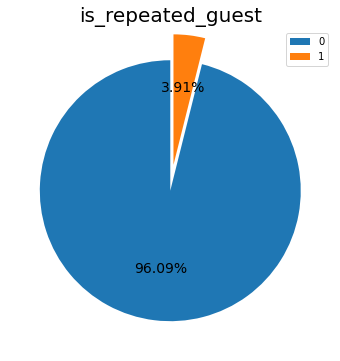

In [18]:
plt.figure(figsize=(7,6))
labels = df['is_repeated_guest'].value_counts().index.tolist()
sizes = df['is_repeated_guest'].value_counts().tolist()
explode = (0, 0.2)
plt.pie(sizes, explode=explode,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('is_repeated_guest', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' :10 })

Conclusion
1. From the above pie chart we can conclude that only 3.91 % guests are repeated and 96.09 % guest
   are  new in our dataset.
   

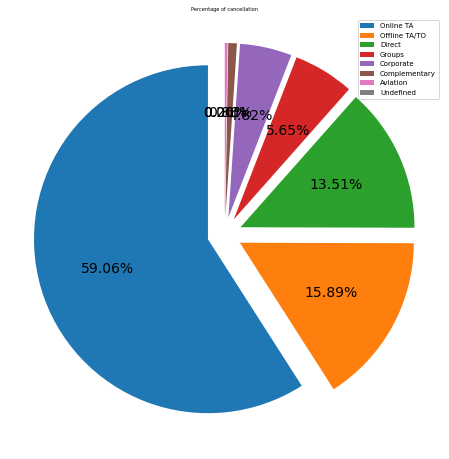

In [19]:
plt.figure(figsize=(12,8))
labels = df['market_segment'].value_counts().index.tolist()
sizes = df['market_segment'].value_counts().tolist()
explode = (0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(sizes, explode=explode,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of cancellation', fontsize=5)
plt.legend(labels,loc=1, prop = {'size' :7 })

Conclusion
1. Above pie chart shows the percentage distribution of market segment use to book hotel.
2. Most number of people book hotel using online TA 
3. After that Offline TA/TD and Direct segment is mostly use to book hotel.


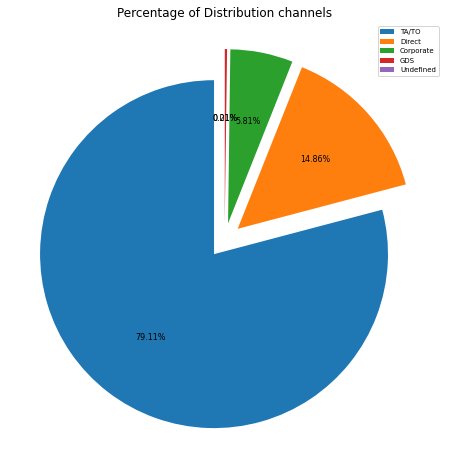

In [20]:
plt.figure(figsize=(12,8))
labels = df['distribution_channel'].value_counts().index.tolist()
sizes = df['distribution_channel'].value_counts().tolist()
explode = (0.1, 0.1,0.1,0.1,0.1)
plt.pie(sizes, explode=explode,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 8})
plt.title('Percentage of Distribution channels', fontsize=12)
plt.legend(labels,loc=1, prop = {'size' :7 })

Conclusion
1. Following pie chart shows the percentage distribution of channel use to book hotels
2. As we can see that TA/TO distribution channel is widly use for booking after that Direct channel 
   is used for booking mostly and GDS channel is least used distribution channel for hotel booking.

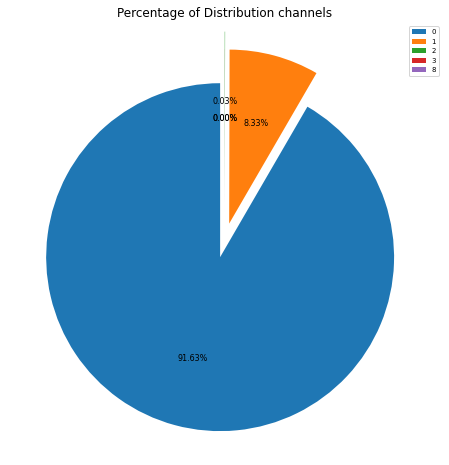

In [21]:
plt.figure(figsize=(12,8))
labels = df['required_car_parking_spaces'].value_counts().index.tolist()
sizes = df['required_car_parking_spaces'].value_counts().tolist()
explode = (0.1, 0.1,0.2,0.1,0.1)
plt.pie(sizes, explode=explode,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 8})
plt.title('Percentage of Distribution channels', fontsize=12)
plt.legend(labels,loc=1, prop = {'size' :7 })

Conclusion
1. As we cn see in the following pie chart there are 91.63 % customers doesnt require any car parking spaces.
2. 8.33 % of custemers requires only 1 car parking spaces.

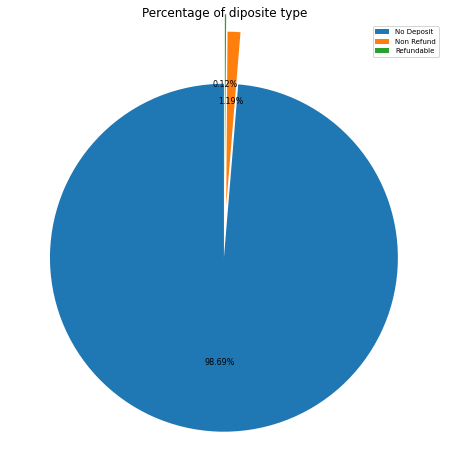

In [22]:
plt.figure(figsize=(12,8))
labels = df['deposit_type'].value_counts().index.tolist()
sizes = df['deposit_type'].value_counts().tolist()
explode = (0.1,0.2,0.3)
plt.pie(sizes, explode=explode,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 8})
plt.title('Percentage of diposite type', fontsize=12)
plt.legend(labels,loc=1, prop = {'size' :7 })

Conclusion
1. There are 98.69 % of customer did not gave any deposite for booking hotels.


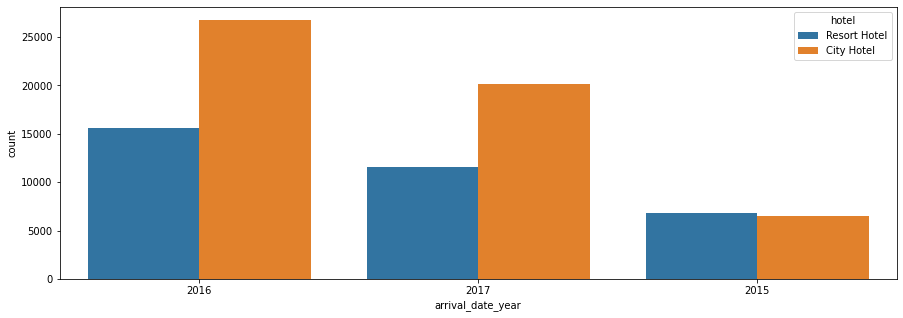

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'arrival_date_year',
              data = df,hue='hotel',
              order = df['arrival_date_year'].value_counts().index,palette="tab10")
plt.show()

Conclusion
1. As we can se in the above bar graph Most custemers books hotel and arrived in hotel in the year 
   of 2016 in that year city hotels are mostly book as compared to resort hotel.
2. In the year of 2015 have least number of custemers who books hotel for resort hotel and city hotel as well.

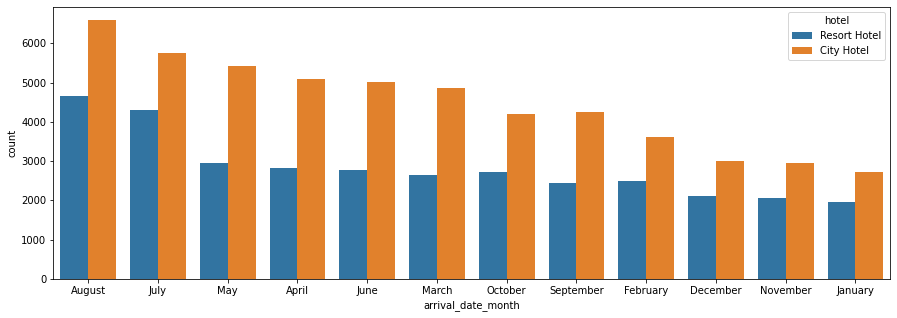

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'arrival_date_month',
              data = df,hue='hotel',
              order = df['arrival_date_month'].value_counts().index,palette="tab10")
plt.show()

Conclusion
1. From the above bar chart we can conclude that customers prefers to book hotel in the month of August,July,May,april that is basically a rainy season also custores book city hotel most than resort hotel in that months.
2. In January,November,December,Febrary month less number of customers book hotel we can say that it is in winter season.
   